In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [3]:
car_crashes = pd.read_csv('Dataset/car_crashes.csv')
car_crashes.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid
0,40-54,18.895,alive,airbag,belted,0,m,25,2002,2000.0,deploy,pass,1,81:99:1
1,25-39,266.532,alive,none,none,1,f,28,2001,1991.0,unavail,driver,0,76:12:2
2,25-39,51.810,alive,airbag,belted,1,f,36,1999,1994.0,deploy,driver,1,78:53:2
3,10-24,1567.626,alive,airbag,belted,0,f,24,2002,1994.0,nodeploy,driver,0,11:47:1
4,25-39,31.342,alive,none,none,1,f,46,1997,1990.0,unavail,pass,0,12:87:2


In [57]:
car_crashes['ageGroup']=pd.cut(
   car_crashes['ageOFocc'],
   bins=[0, 25, 40, 60, sys.maxsize],
   labels=['<= 24', '25 - 39', '40 - 59', '>= 60'])

In [58]:
car_crashes

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,ageGroup
0,40-54,18.895,alive,airbag,belted,0,m,25,2002,2000.0,deploy,pass,1,81:99:1,<= 24
1,25-39,266.532,alive,none,none,1,f,28,2001,1991.0,unavail,driver,0,76:12:2,25 - 39
2,25-39,51.810,alive,airbag,belted,1,f,36,1999,1994.0,deploy,driver,1,78:53:2,25 - 39
3,10-24,1567.626,alive,airbag,belted,0,f,24,2002,1994.0,nodeploy,driver,0,11:47:1,<= 24
4,25-39,31.342,alive,none,none,1,f,46,1997,1990.0,unavail,pass,0,12:87:2,40 - 59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8647,10-24,64.757,alive,airbag,none,0,m,37,2001,1999.0,nodeploy,driver,0,6:71:2,25 - 39
8648,1-9km/h,178.651,alive,airbag,none,1,f,16,2001,2001.0,deploy,pass,1,76:57:2,<= 24
8649,25-39,482.272,alive,airbag,belted,1,m,16,1997,1992.0,deploy,driver,1,74:65:1,<= 24
8650,55+,32.467,alive,none,belted,1,m,26,1998,1994.0,unavail,driver,0,12:4:2,25 - 39


In [32]:
# Informações Gerais

car_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   dvcat     8652 non-null   object  
 1   weight    8652 non-null   float64 
 2   dead      8652 non-null   object  
 3   airbag    8652 non-null   object  
 4   seatbelt  8652 non-null   object  
 5   frontal   8652 non-null   int64   
 6   sex       8652 non-null   object  
 7   ageOFocc  8652 non-null   int64   
 8   yearacc   8652 non-null   int64   
 9   yearVeh   8651 non-null   float64 
 10  abcat     8652 non-null   object  
 11  occRole   8652 non-null   object  
 12  deploy    8652 non-null   int64   
 13  caseid    8652 non-null   object  
 14  ageGroup  8652 non-null   category
dtypes: category(1), float64(2), int64(4), object(8)
memory usage: 955.1+ KB


In [59]:
# Descrições Numéricas

car_crashes.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy
count,8652.000000,8652.000000,8652.000000,8652.000000,8651.000000,8652.000000
mean,471.030930,0.643088,37.193597,1999.549584,1992.725118,0.330675
std,1628.476678,0.479116,17.837210,1.703408,5.647203,0.470483
min,0.000000,0.000000,16.000000,1997.000000,1956.000000,0.000000
25%,32.824000,0.000000,22.000000,1998.000000,1989.000000,0.000000
50%,87.586000,1.000000,33.000000,2000.000000,1994.000000,0.000000
75%,375.368000,1.000000,47.000000,2001.000000,1997.000000,1.000000
max,57871.595000,1.000000,97.000000,2002.000000,2003.000000,1.000000


In [60]:
# Tipos de dados 

car_crashes.dtypes

dvcat         object
weight       float64
dead          object
airbag        object
seatbelt      object
frontal        int64
sex           object
ageOFocc       int64
yearacc        int64
yearVeh      float64
abcat         object
occRole       object
deploy         int64
caseid        object
ageGroup    category
dtype: object

In [61]:
# Verificando quais colunas são dados numéricos

car_crashes.select_dtypes(include='number').head() 

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy
0,18.895,0,25,2002,2000.0,1
1,266.532,1,28,2001,1991.0,0
2,51.810,1,36,1999,1994.0,1
3,1567.626,0,24,2002,1994.0,0
4,31.342,1,46,1997,1990.0,0


In [8]:
# Verificando se há dados vazios

# Apenas a coluna de ano do veículo possui um dado vazio, esta coluna não foi necessária para nenhuma análise

car_crashes.isnull().sum()

dvcat       0
weight      0
dead        0
airbag      0
seatbelt    0
frontal     0
sex         0
ageOFocc    0
yearacc     0
yearVeh     1
abcat       0
occRole     0
deploy      0
caseid      0
ageGroup    0
dtype: int64

In [62]:
# Contagem de dados

car_crashes.count()

dvcat       8652
weight      8652
dead        8652
airbag      8652
seatbelt    8652
frontal     8652
sex         8652
ageOFocc    8652
yearacc     8652
yearVeh     8651
abcat       8652
occRole     8652
deploy      8652
caseid      8652
ageGroup    8652
dtype: int64

In [63]:
# Verificando Duplicados

car_crashes[car_crashes.duplicated()]

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,ageGroup


In [65]:
# Verificando possíveis erros

# Considerando que a coluna 'caseid' se refere a uma identificação do acidente, temos 5690 acidentes registrados

car_crashes.nunique()

dvcat          5
weight      5310
dead           2
airbag         2
seatbelt       2
frontal        2
sex            2
ageOFocc      79
yearacc        6
yearVeh       40
abcat          3
occRole        2
deploy         2
caseid      5690
ageGroup       4
dtype: int64

In [11]:
# Verificando o máximo de pessoas envolvidas em um acidente

car_crashes['caseid'].value_counts().max()

6

In [66]:
# Verificando o máximo de carros envolvidos em um acidente 

car_crashes[car_crashes['occRole']=='driver']['caseid'].value_counts().max()

5

In [55]:
# Verificando quantidade de acidentados por ano

car_crashes['yearacc'].value_counts()

2002    1574
1999    1503
1998    1464
2000    1453
2001    1340
1997    1318
Name: yearacc, dtype: int64

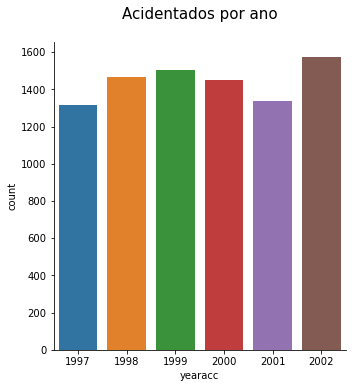

In [94]:
sns.catplot(x="yearacc", kind="count", data=car_crashes)

plt.title('Acidentados por ano\n', fontsize = 15)

plt.show()

# HIPÓTESES

## 1 - Mulheres são mais prudentes no trânsito;


## 2 - Cinto de segurança ou Airbag reduzem chances de acidentes fatais;


## 3 - Pessoas mais novas são mais imprudentes;


## 4 - Altas velocidades causam mais acidentes.





## HIPÓTESE 1: Mulheres são mais prudentes no trânsito

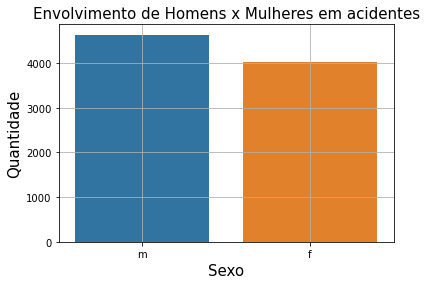

In [89]:

sns.countplot(data = car_crashes, x='sex')

plt.title('Envolvimento de Homens x Mulheres em acidentes', fontsize = 15)

plt.xlabel('Sexo', fontsize=15)

plt.ylabel('Quantidade', fontsize=15)

plt.grid()

plt.show()

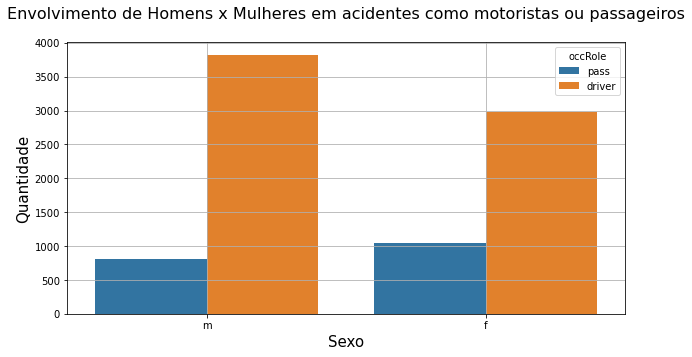

In [88]:
plt.figure(figsize = (10, 5))

sns.countplot(x="sex", hue="occRole", data=car_crashes)

plt.title('Envolvimento de Homens x Mulheres em acidentes como motoristas ou passageiros\n', fontsize = 16)

plt.xlabel('Sexo', fontsize=15)

plt.ylabel('Quantidade', fontsize=15)

plt.grid()

plt.show()

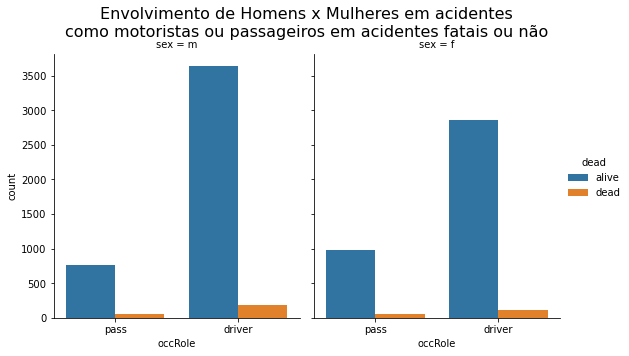

In [117]:
sns.catplot(x="occRole", hue="dead", col="sex",
                data=car_crashes, kind="count",
                height=5, aspect=.8);
               
plt.suptitle('Envolvimento de Homens x Mulheres em acidentes \ncomo motoristas ou passageiros em acidentes fatais ou não \n', fontsize = 16)

plt.subplots_adjust(top=0.85)

plt.show()

In [67]:
# criando um dataset apenas de motoristas
df_drivers1 = car_crashes[car_crashes['occRole']=='driver']

# entendendo a distribução de sexo entre os motoristas
df_drivers1['sex'].value_counts(normalize=True)

m    0.561847
f    0.438153
Name: sex, dtype: float64

56,18% dos motoristas são homens, 43,82% são mulheres

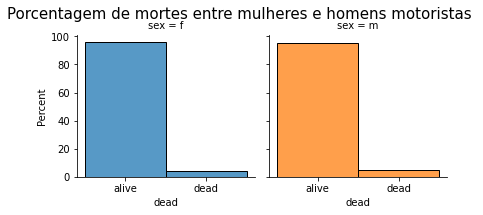

In [119]:
grid = sns.FacetGrid(df_drivers1, col='sex',hue='sex')

grid.map(sns.histplot, 'dead', stat='percent')

plt.suptitle('Porcentagem de mortes entre mulheres e homens motoristas \n \n', fontsize = 15)

plt.subplots_adjust(top=0.85)

plt.show()

In [15]:
# total de homens e mulheres entre os motoristas

df_drivers1['sex'].value_counts()

m    3820
f    2979
Name: sex, dtype: int64

In [120]:
#distribuição de morte entre motoristas mulheres 

df_drivers1[df_drivers1['sex']=='f'].groupby(["sex",'dead'])['dead'].count()/29.79

sex  dead 
f    alive    96.173212
     dead      3.826788
Name: dead, dtype: float64

In [121]:
#distribuição de morte entre motoristas homens
df_drivers1[df_drivers1['sex']=='m'].groupby(["sex",'dead'])['dead'].count()/38.20

sex  dead 
m    alive    95.183246
     dead      4.816754
Name: dead, dtype: float64

3,82% das motoristas acidentadas mulheres morreram.

4,81% dos motoristas acidentados homens morreram.


Motoristas mulheres morrem proporcionalmente menos do que motoristas homens.

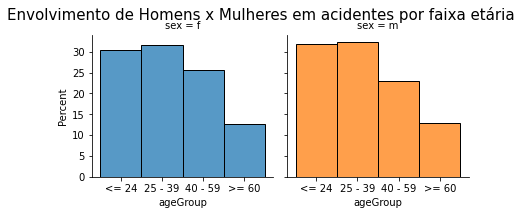

In [128]:

grid = sns.FacetGrid(df_drivers1, col='sex',hue='sex')

grid.map(sns.histplot, 'ageGroup', stat='percent')

plt.suptitle('Envolvimento de Homens x Mulheres em acidentes por faixa etária \n \n', fontsize = 15)

plt.subplots_adjust(top=0.85)

plt.show()


In [122]:
#distribuição de morte entre motoristas mulheres 

df_drivers1[df_drivers1['sex']=='f'].groupby(["sex",'ageGroup'])['ageGroup'].count()/29.79 

sex  ageGroup
f    <= 24       30.312185
     25 - 39     31.554213
     40 - 59     25.579053
     >= 60       12.554549
Name: ageGroup, dtype: float64

In [123]:
#distribuição de morte entre motoristas homens

df_drivers1[df_drivers1['sex']=='m'].groupby(["sex",'ageGroup'])['ageGroup'].count()/38.20

sex  ageGroup
m    <= 24       31.910995
     25 - 39     32.408377
     40 - 59     22.879581
     >= 60       12.801047
Name: ageGroup, dtype: float64

Para motoristas mulheres e homens, os acidentes ocorrem mais entre 25 e 39 anos.


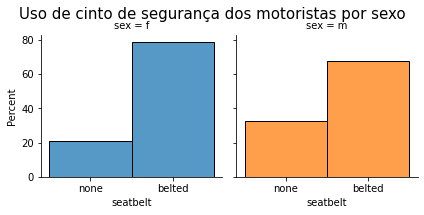

In [131]:
grid = sns.FacetGrid(df_drivers1, col='sex',hue='sex')

grid.map(sns.histplot, 'seatbelt', stat='percent')

plt.suptitle('Uso de cinto de segurança dos motoristas por sexo', fontsize = 15)

plt.subplots_adjust(top=0.85)

plt.show()

In [124]:
# uso de cinto entre motoristas mulheres 

df_drivers1[df_drivers1['sex']=='f'].groupby(["sex",'seatbelt'])['seatbelt'].count()/29.79

sex  seatbelt
f    belted      78.986237
     none        21.013763
Name: seatbelt, dtype: float64

In [125]:
#uso de cinto entre motoristas homens

df_drivers1[df_drivers1['sex']=='m'].groupby(["sex",'seatbelt'])['seatbelt'].count()/38.20

sex  seatbelt
m    belted      67.565445
     none        32.434555
Name: seatbelt, dtype: float64

Motoristas mulheres usam mais cinto de segurança (78,98%) do que motoristas homens.


In [26]:
# Avaliando a velocidade em que os motoristas dirigiam

# melhorando a leitura da coluna 'dvcat':
# criando um DataFrame para atribuição:
dfApoio = pd.DataFrame({'dvcat': ['1-9km/h','10-24','25-39','40-54','55+'], 
                   'speed': ['1','2','3','4','5']})
#df_drivers1['dvcat'].value_counts()
print(dfApoio)

     dvcat speed
0  1-9km/h     1
1    10-24     2
2    25-39     3
3    40-54     4
4      55+     5


In [31]:
dfApoio

,dvcat,speed
0,1-9km/h,1
1,10-24,2
2,25-39,3
3,40-54,4
4,55+,5


In [27]:
# usando .merge a partir da chave 'dvcat':
df_drivers2 = pd.merge(df_drivers1,dfApoio, on='dvcat') 
df_drivers2.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,ageGroup,speed
0,25-39,266.532,alive,none,none,1,f,28,2001,1991.0,unavail,driver,0,76:12:2,25 à 39,3
1,25-39,51.810,alive,airbag,belted,1,f,36,1999,1994.0,deploy,driver,1,78:53:2,25 à 39,3
2,25-39,232.832,alive,none,belted,0,f,38,2001,1990.0,unavail,driver,0,13:143:1,25 à 39,3
3,25-39,541.288,alive,airbag,belted,1,m,28,2002,1997.0,deploy,driver,1,12:2:1,25 à 39,3
4,25-39,509.489,alive,none,none,1,m,19,2002,1990.0,unavail,driver,0,74:107:2,até 24,3


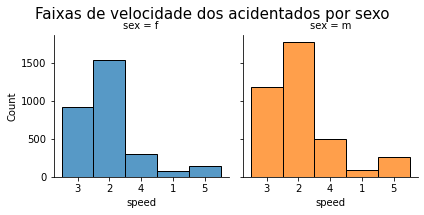

In [132]:
# comparando graficamente

grid = sns.FacetGrid(df_drivers2, col='sex',hue='sex')

grid.map(sns.histplot,'speed')

plt.suptitle('Faixas de velocidade dos acidentados por sexo\n', fontsize = 15)

plt.subplots_adjust(top=0.85)

plt.show()

In [126]:
#distribuição de velocidade entre motoristas mulheres 

df_drivers2[df_drivers2['sex']=='f'].groupby(["sex",'speed'])['speed'].count()/29.79

sex  speed
f    1         2.416918
     2        51.795905
     3        30.748573
     4        10.305472
     5         4.733132
Name: speed, dtype: float64

In [127]:
#distribuição de velocidade entre motoristas homens 

df_drivers2[df_drivers2['sex']=='m'].groupby(["sex",'speed'])['speed'].count()/38.20

sex  speed
m    1         2.434555
     2        46.649215
     3        31.099476
     4        13.062827
     5         6.753927
Name: speed, dtype: float64

Proporcionalmente, homens e mulheres tem velocidades muito semelhante entre os acidentes, porém homens estão mais presentes  em velocidades maiores.

## Conclusão: Mulheres apresentam mais sinais de prudência no trânsito, principalmente pelo uso do cinto e velocidade, apesar da pouca diferença.



## HIPÓTESE 2: Cinto de segurança ou Airbag reduzem chances de acidentes fatais

In [33]:
car_crashes['dead'].value_counts()

alive    8249
dead      403
Name: dead, dtype: int64

In [34]:
car_crashes['airbag'].value_counts()

airbag    4695
none      3957
Name: airbag, dtype: int64

In [35]:
car_crashes['seatbelt'].value_counts()

belted    6114
none      2538
Name: seatbelt, dtype: int64

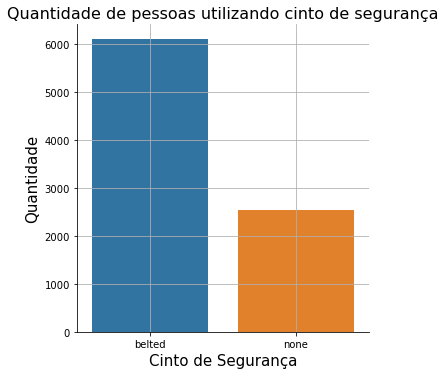

In [51]:
sns.catplot(x="seatbelt", kind="count", data=car_crashes)

plt.title('Quantidade de pessoas utilizando cinto de segurança', fontsize = 16)

plt.xlabel('Cinto de Segurança', fontsize=15)

plt.ylabel('Quantidade', fontsize=15)

plt.grid()

plt.show()

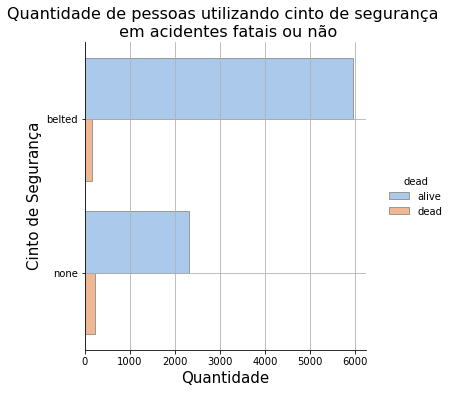

In [52]:
sns.catplot(y="seatbelt", hue="dead", kind="count",
            palette="pastel", edgecolor=".6",
            data=car_crashes)

plt.title('Quantidade de pessoas utilizando cinto de segurança \n em acidentes fatais ou não', fontsize = 16)

plt.xlabel('Quantidade', fontsize=15)

plt.ylabel('Cinto de Segurança', fontsize=15)

plt.grid()

plt.show()

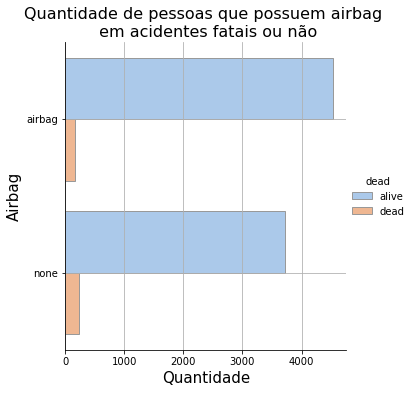

In [135]:
sns.catplot(y="airbag", hue="dead", kind="count",
            palette="pastel", edgecolor=".6",
            data=car_crashes)

plt.title('Quantidade de pessoas que possuem airbag \n em acidentes fatais ou não', fontsize = 16)

plt.xlabel('Quantidade', fontsize=15)

plt.ylabel('Airbag', fontsize=15)

plt.grid()

plt.show()

In [40]:
car_crashes.groupby(["dead", "seatbelt"])["seatbelt"].agg(["count"])

count
dead  seatbelt       
alive belted     5943
      none       2306
dead  belted      171
      none        232

In [39]:
car_crashes.groupby(["dead", "airbag"])["airbag"].agg(["count"])

count
dead  airbag       
alive airbag   4531
      none     3718
dead  airbag    164
      none      239

In [41]:
car_crashes.groupby(["seatbelt", "airbag", "dead"])["dead"].agg(["count"])

count
seatbelt airbag dead        
belted   airbag alive   3573
                dead      68
         none   alive   2370
                dead     103
none     airbag alive    958
                dead      96
         none   alive   1348
                dead     136

## Conclusão: Cintos de segurança e Airbags diminuem riscos de acidentes fatais.

## HIPÓTESE 3: Pessoas mais novas são mais imprudentes


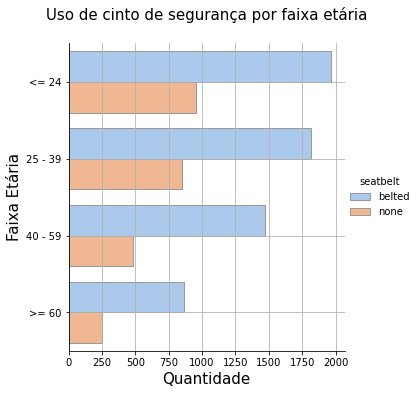

In [98]:
sns.catplot(y="ageGroup", hue="seatbelt", kind="count",
            palette="pastel", edgecolor=".6",
            data=car_crashes)

plt.title('Uso de cinto de segurança por faixa etária\n', fontsize = 15)

plt.xlabel('Quantidade', fontsize=15)

plt.ylabel('Faixa Etária', fontsize=15)

plt.grid()

plt.show()

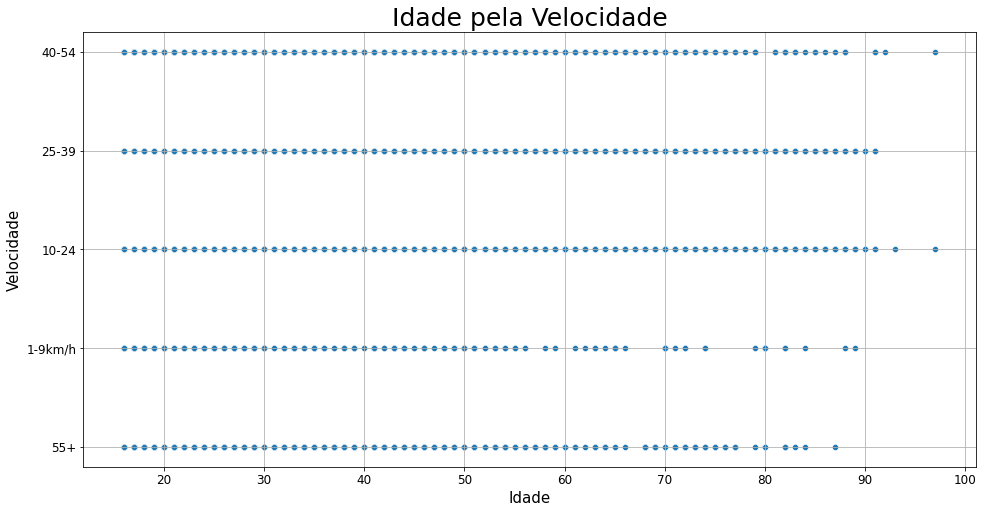

In [42]:
plt.figure(figsize = (16, 8)) ## Tamanho da figura em polegadas

# Gráfico de dispersão
sns.scatterplot(data = car_crashes, x='ageOFocc', y='dvcat')

# Coloca o titulo
plt.title('Idade pela Velocidade', fontsize = 25)

# Titulo para eixo X
plt.xlabel('Idade', fontsize=15)

# Titulo para eixo Y
plt.ylabel('Velocidade', fontsize=15)

# Tamanho da fonte da grade X
plt.xticks(fontsize = 12)

# Tamanho da fonte da grade Y
plt.yticks(fontsize = 12)

# Colocando Grid no Gráfico
plt.grid()

# Mostra o nosso Gráfico
plt.show()

In [43]:
car_crashes.groupby(['dvcat'])['ageOFocc'].agg(["mean"])

,mean
dvcat,
1-9km/h,36.705607
10-24,37.941708
25-39,37.236697
40-54,35.387512
55+,34.528942


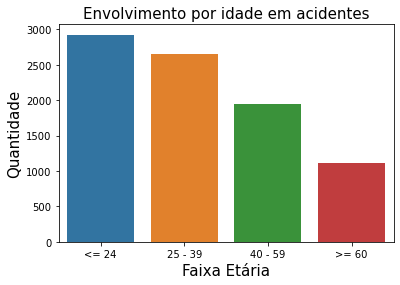

In [101]:
sns.countplot(data = car_crashes, x='ageGroup')

plt.title('Envolvimento por idade em acidentes', fontsize = 15)

plt.xlabel('Faixa Etária', fontsize=15)

plt.ylabel('Quantidade', fontsize=15)

plt.show()

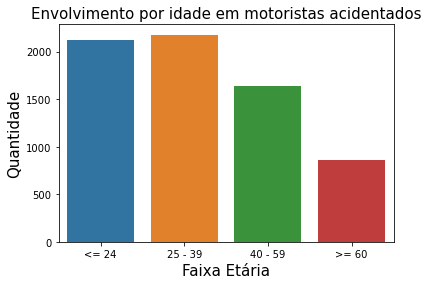

In [103]:
sns.countplot(data = df_drivers1, x='ageGroup')

plt.title('Envolvimento por idade em motoristas acidentados', fontsize = 15)

plt.xlabel('Faixa Etária', fontsize=15)

plt.ylabel('Quantidade', fontsize=15)

plt.show()

## Conclusão: Pessoas mais velhas são mais prudentes, tanto pelo envolvimento, quanto pelo uso de cinto de segurança.

## HIPÓTESE 4: Altas velocidades causam mais acidentes

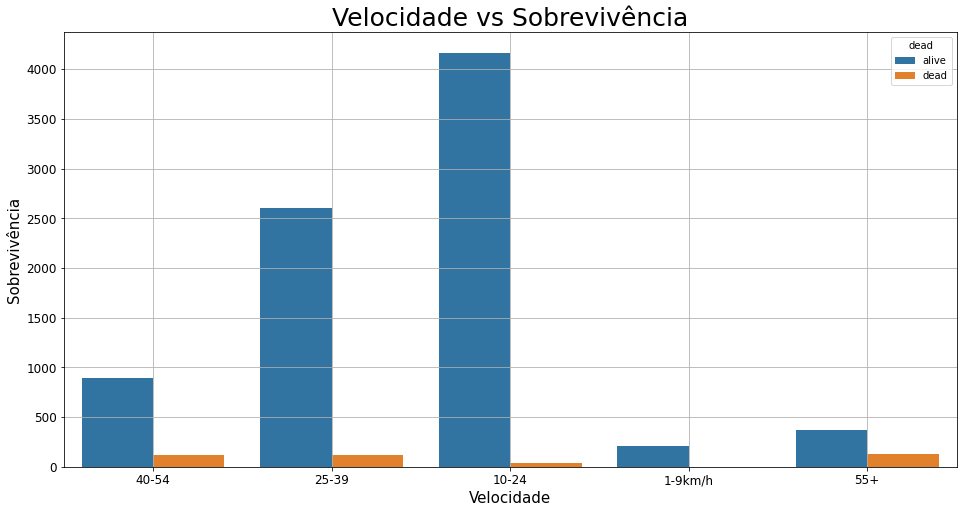

In [137]:
plt.figure(figsize = (16, 8)) ## Tamanho da figura em polegadas

# Gráfico de dispersão
sns.countplot(data=car_crashes, x='dvcat', hue='dead')

# Coloca o titulo
plt.title('Velocidade vs Sobrevivência', fontsize = 25)

# Titulo para eixo X
plt.xlabel('Velocidade', fontsize=15)

# Titulo para eixo Y
plt.ylabel('Sobrevivência', fontsize=15)

# Tamanho da fonte da grade X
plt.xticks(fontsize = 12)

# Tamanho da fonte da grade Y
plt.yticks(fontsize = 12)

# Colocando Grid no Gráfico
plt.grid()

# Mostra o nosso Gráfico
plt.show()

## Conclusão: Nessa base de dados os acidentes ocorrem em sua maioria com velocidades baixas ou médias, porém com o aumento da velocidade, a chance de morte é maior.